### Converting text data to lower text

In [1]:
text=['This is introduction to NLP','It is likely to be useful,to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!','R is good langauage',
      'I like this book','I want more books like this']

In [2]:
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful,to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I like this book
7,I want more books like this


In [3]:
x = 'Testing'
x2 = x.lower()
print(x2)

testing


In [4]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
df['tweet']

0                          this is introduction to nlp
1                  it is likely to be useful,to people
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

### Removing Punctuation

In [5]:
import re
s = "I. like. This book!"
s = "Covid-19 có thể kéo theo hàng loạt khủng hoảng kinh tế, lương thực, chính trị..., đảo ngược tiến độ phát triển của thế giới tới hàng chục năm"
s1 = re.sub(r'[^\w\s]','',s)
s1

'Covid19 có thể kéo theo hàng loạt khủng hoảng kinh tế lương thực chính trị đảo ngược tiến độ phát triển của thế giới tới hàng chục năm'

In [6]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet']

0                          this is introduction to nlp
1                  it is likely to be useful,to people
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

### Removing Stop Words

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Gia
[nltk_data]     Bao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### Standardizing Text

In [9]:
lookup_dict = {'nlp':'natural language processing',
               'ur':'your', "wbu" : "what about you"}
def text_std(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        word = re.sub(r'[^\w\s]', '',word)
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
            new_words.append(word)
            new_text = " ".join(new_words)
    return new_text

In [10]:
text_std("I like nlp it's ur choice")

'natural language processing your'

### Correcting Spelling

In [11]:
text=['Introduction to NLP','It is likely to be useful, to people ',
      'Machine learning is the new electrcity', 'R is good langauage',
      'I like this book','I want more books like this']
df = pd.DataFrame({'tweet':text})
df

,tweet
0,Introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electrcity
3,R is good langauage
4,I like this book
5,I want more books like this


In [13]:
from textblob import TextBlob
df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

0                        Introduction to NLP
1      It is likely to be useful, to people 
2    Machine learning is the new electricity
3                         R is good language
4                           I like this book
5                I want more books like this
Name: tweet, dtype: object

### Tokenizing Text

In [15]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to C:\Users\Gia
[nltk_data]     Bao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to C:\Users\Gia
[nltk_data]     Bao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\Gia
[nltk_data]     Bao\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gia Bao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to C:\Users\Gia
[nltk_data]     Bao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to C:\Users\Gia
[nltk_data]     Bao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [16]:
# textblob
string_ = 'There would be less hype around AI and more action going forward'
TextBlob(string_).words

WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'going', 'forward'])

In [17]:
# nltk
import nltk
nltk.word_tokenize(string_)

['There',
 'would',
 'be',
 'less',
 'hype',
 'around',
 'AI',
 'and',
 'more',
 'action',
 'going',
 'forward']

In [18]:
string_.split()

['There',
 'would',
 'be',
 'less',
 'hype',
 'around',
 'AI',
 'and',
 'more',
 'action',
 'going',
 'forward']

### Stemming

In [19]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                     introduct to nlp
1    it is like to be useful, to peopl
2      machin learn is the new electrc
3                   r is good langauag
4                      i like thi book
5            i want more book like thi
Name: tweet, dtype: object

### Lemmatizing

In [20]:
from textblob import Word
nltk.download('wordnet')
df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to C:\Users\Gia
[nltk_data]     Bao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                       Introduction to NLP
1      It is likely to be useful, to people
2    Machine learning is the new electrcity
3                       R is good langauage
4                          I like this book
5                I want more book like this
Name: tweet, dtype: object

### Exploring Text Data

In [21]:
nltk.download('webtext')
from nltk.corpus import webtext
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')
print(wt_words[:100])

[nltk_data] Downloading package webtext to C:\Users\Gia
[nltk_data]     Bao\AppData\Roaming\nltk_data...


['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.', '[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.', '#', 'ifdefs', 'for', 'MOZ_PHOENIX', 'customize', 'dialog', "'", 's', 'toolbar', 'has', 'small', 'icons', 'when', 'small', 'icons', 'is', 'not', 'checked', 'nightly', 'builds', 'and', 'tinderboxen', 'for']


[nltk_data]   Unzipping corpora\webtext.zip.


In [22]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string
print(len(wt_sentences))
print(len(wt_words))

1144
102457


In [23]:
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

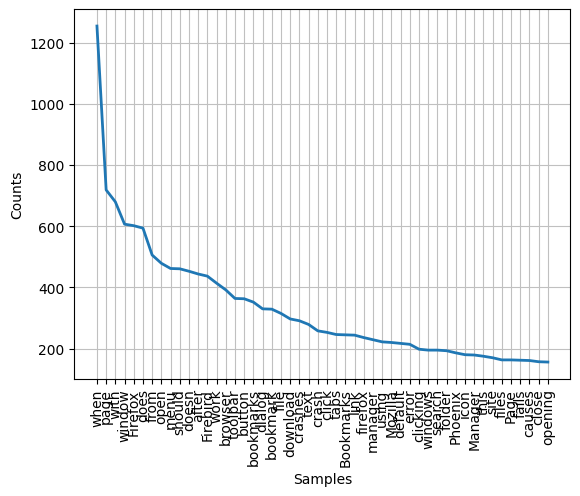

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
%matplotlib inline
frequency_dist.plot(50,cumulative=False)

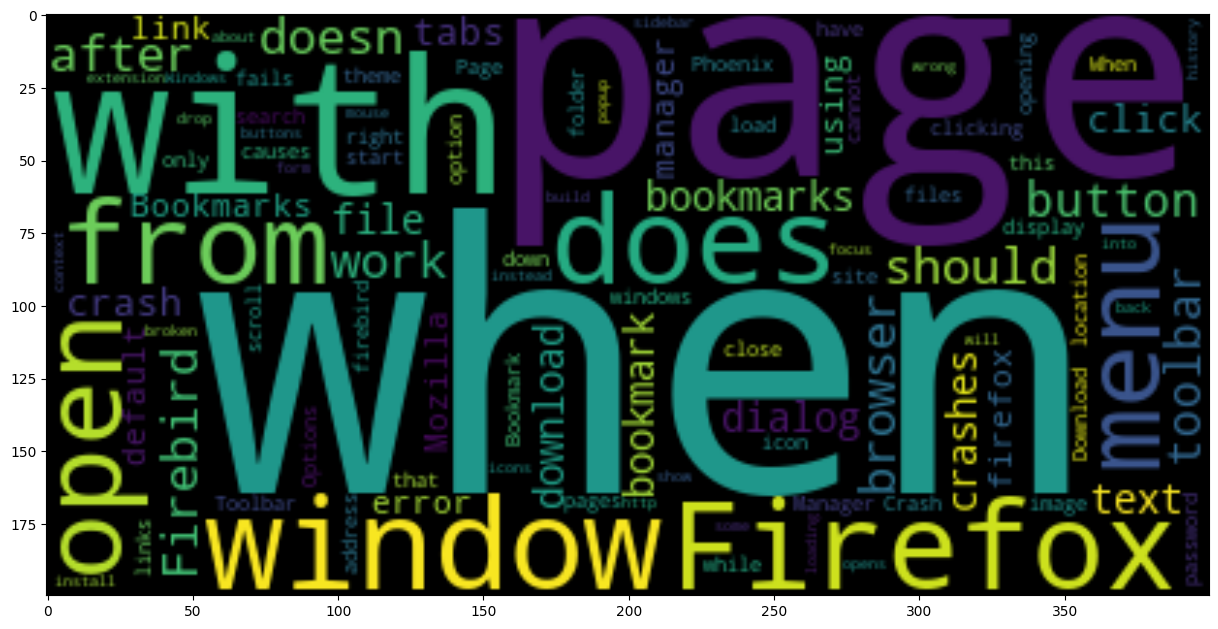

In [26]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.imshow(wcloud, interpolation='bilinear')
plt.show()

### Building a Text Preprocessing Pipeline

In [27]:
tweet_sample= "How to take control of your #debt https:// personal.vanguard.com/us/insights/saving-investing/debt-­management.#Best advice for #family #financial #success (@PrepareToWin)"

In [28]:
def processRow(row):
    
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    
    tweet = row
    #Lower case
    tweet.lower()
    #Removes unicode strings like "\u002c" and "x96" 
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', tweet)       
    tweet = re.sub(r'[^\x00-\x7f]',r'',tweet)
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
    #remove numbers
    tweet = ''.join([i for i in tweet if not i.isdigit()]) 
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    #lemma
    from textblob import Word
    tweet =" ".join([Word(word).lemmatize() for word in tweet.split()])
    #stemmer
    #st = PorterStemmer()
    #tweet=" ".join([st.stem(word) for word in tweet.split()])
    #Removes emoticons from text 
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', tweet)
    #trim
    tweet = tweet.strip('\'"')

    row = tweet

    return row

#call the function with your data
processRow(tweet_sample)

'How to take control of your debt http personal vanguard com u insight saving investing debt management Best advice for family financial success AT_USER'